In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.calibration import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay , accuracy_score
import numpy as np
from matplotlib import pyplot as plt

In [2]:
labeled_df = pd.read_csv('../../data/labeled.csv')
labeled_df.head()

,id,text,cleaned_text_with_stop_words_removal,label
0,1807053896587919743,We should consider dismantling provincial stru...,consid dismantl provinci structur empow local ...,neutral
1,1807031275989114981,Those joining in insurance online will be requ...,join insur onlin requir provid nation ident ca...,positive
2,1807030978554269711,Minister Aryal also requested the provincial a...,minist aryal also request provinci local gover...,positive
3,1807029744837300466,\xf0\x9f\x8c\xbe Happy National Paddy Day (Aas...,xf0x9fx8cxbe happi nation paddi day aasar 15 x...,positive
4,1806998724926755034,Climate action plans and targets set by the Ne...,climat action plan target set nepal govern gui...,positive


In [3]:
labeled_df.isnull().sum()
null_rows = labeled_df[labeled_df['cleaned_text_with_stop_words_removal'].isnull()]
print("Rows with null values in 'cleaned_text_with_stop_words_removal':")
print(null_rows)
labeled_df.dropna(subset=['cleaned_text_with_stop_words_removal'], inplace=True)
duplicates_text = labeled_df.duplicated(subset=['cleaned_text_with_stop_words_removal'])
labeled_df[duplicates_text]

Rows with null values in 'cleaned_text_with_stop_words_removal':
                       id                                               text  \
7913  1149606322318401536  @SudeepS1402 @rsansar @katesictibet @LokAawaaz...   

     cleaned_text_with_stop_words_removal    label  
7913                                  NaN  neutral  


,id,text,cleaned_text_with_stop_words_removal,label


In [4]:
# def plot_confusion_matrix(cm, model_name, labels):
#         disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
#         disp.plot(cmap=plt.cm.Blues, values_format='d')
#         plt.title(f'Confusion Matrix for {model_name} (Train-Test Split: 80-20)')
#         plt.show()

        
# def trainSvc(X_train, X_test, y_train, y_test):
#     # Train SVM model
#     # svm_model = SVC(C=10, class_weight='balanced')
#     svm_model = SVC()
#     svm_model.fit(X_train, y_train)

#     # Evaluate SVM model
#     svm_predictions = svm_model.predict(X_test)
#     print("SVM Model Performance:")
#     print(classification_report(y_test, svm_predictions))
#     svm_conf_matrix = confusion_matrix(y_test, svm_predictions, labels=np.unique(y_test))
#     plot_confusion_matrix(svm_conf_matrix, f'SVM', np.unique(y_test))
#     # print(svm_conf_matrix)

# def trainNaive(X_train, X_test, y_train, y_test):
#     # Train Naive Bayes model
#     nb_model = MultinomialNB()
#     nb_model.fit(X_train, y_train)

#     # Evaluate Naive Bayes model
#     nb_predictions = nb_model.predict(X_test)
#     print("Naive Bayes Model Performance:")
#     print(classification_report(y_test, nb_predictions))
#     # svm_conf_matrix = confusion_matrix(y_test, nb_predictions, labels=['Positive', 'Negative', 'Neutral'])
    

In [5]:
# Initialize TF-IDF Vectorizer


def Vectorize(text):

    tfidf = TfidfVectorizer(max_features=5000,ngram_range=(1,1))

    # Fit and transform the labeled data
    return tfidf.fit_transform(text)
     

In [8]:
# y=["positive","neutral","negative"]
# label_encoder = LabelEncoder()
# y_labeled = label_encoder.fit_transform(y)
# print(y_labeled)

In [9]:
# countpositive = 0
# countnegative=0
# countneutral=0
# for data in labeled_df['label']:
#     # print(data)
#     if data == 2:
#         countpositive = countpositive +1
#     elif data == 0:
#         countnegative = countnegative +1
#     else:
#         countneutral = countneutral +1


# print(countpositive,countnegative,countneutral)

In [34]:
# print("Shape of X_labeled:", X_labeled.shape)
# print("Length of y_labeled:", len(y_labeled))
label_encoder = LabelEncoder()
X_labeled = Vectorize(labeled_df['cleaned_text_with_stop_words_removal'])
y_labeled = label_encoder.fit_transform(labeled_df['label'])
# print("Shape of X_labeled after vectorization:", X_labeled.shape)
# print("Length of y_labeled after vectorization:", len(y_labeled))

Shape of X_labeled: (8440, 5000)
Length of y_labeled: 8440
Shape of X_labeled after vectorization: (8440, 5000)
Length of y_labeled after vectorization: 8440


In [41]:
# trainSvc(X_train, X_test, y_train, y_test)
# trainNaive(X_train, X_test, y_train, y_test)

In [55]:
def train_predict_plot(X_train, X_test, y_train, y_test, split):
    # Train Naive Bayes model
    nb_model = MultinomialNB()
    nb_model.fit(X_train, y_train)
    nb_predictions = nb_model.predict(X_test)
    nb_conf_matrix = confusion_matrix(y_test, nb_predictions, labels=np.unique(y_test))
    nb_accuracy = accuracy_score(y_test, nb_predictions)
    print(classification_report(y_test, nb_predictions))
    train_predictions_nb = nb_model.predict(X_train)
    train_accuracy_nb = accuracy_score(y_train, train_predictions_nb)
    print("Naive Bayes Training Accuracy:", train_accuracy_nb)

    test_predictions_nb = nb_model.predict(X_test)
    test_accuracy_nb = accuracy_score(y_test, test_predictions_nb)
    print("Naive Bayes Test Accuracy:", test_accuracy_nb)
    
    # Train SVM model
    svm_model = SVC()
    # svm_model = SVC( C = 1, gamma = 'scale',kernel='linear')
    svm_model.fit(X_train, y_train)
    svm_predictions = svm_model.predict(X_test)
    svm_accuracy = accuracy_score(y_test, svm_predictions)
    svm_conf_matrix = confusion_matrix(y_test, svm_predictions, labels=np.unique(y_test))
    svm_accuracy = accuracy_score(y_test, svm_predictions)
    print(classification_report(y_test, svm_predictions))
    # # Evaluate on training set
    # train_predictions_svm = svm_model.predict(X_train)
    # train_accuracy_svm = accuracy_score(y_train, train_predictions_svm)
    # print("SVM Training Accuracy:", train_accuracy_svm)

    # # Evaluate on test set
    # test_predictions_svm = svm_model.predict(X_test)
    # test_accuracy_svm = accuracy_score(y_test, test_predictions_svm)
    # print("SVM Test Accuracy:", test_accuracy_svm)
    

    # Plot confusion matrices
    def plot_confusion_matrix(cm, model_name, accuracy,labels):
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
        disp.plot(cmap=plt.cm.Blues, values_format='d')
        plt.title(f'Confusion Matrix for {model_name} (Train-Test Split: {split*100}-{(100-split*100)})')
        plt.suptitle(f'Accuracy: {accuracy:.2f}', fontsize=12, y=0.97) 
        # plt.text(0.5, -0.1, f'Accuracy: {accuracy:.2f}', ha='center', va='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))
        plt.savefig(f'../../reports/poli/confusion_matrix_{model_name}_{split*100}_{100-split*100}.png', bbox_inches='tight')
        plt.show()

    plot_confusion_matrix(svm_conf_matrix, f'SVM',svm_accuracy, np.unique(y_test))
    plot_confusion_matrix(nb_conf_matrix, f'Naive Bayes',nb_accuracy, np.unique(y_test))
    


In [50]:
from imblearn.over_sampling import SMOTE



# # Split the labeled data into training and test sets
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_labeled, y_labeled)
# X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, stratify= y_resampled, test_size=0.2,random_state=42)

# print("Shape of X_resampled:", X_resampled.shape)
# print("Length of y_resampled:", len(y_resampled))
# print("X_train shape:", X_train.shape)
# print("X_test shape:", X_test.shape)
# print("y_train length:", len(y_train))
# print("y_test length:", len(y_test))
# countpositive = 0
# countnegative=0
# countneutral=0


# for data in y_train:
#     # print(data)
#     if data == 2:
#         countpositive = countpositive +1
#     elif data == 0:
#         countnegative = countnegative +1
#     else:
#         countneutral = countneutral +1


# print(countpositive,countnegative,countneutral)

              precision    recall  f1-score   support

           0       0.72      0.76      0.74       711
           1       0.77      0.71      0.74       712
           2       0.70      0.72      0.71       712

    accuracy                           0.73      2135
   macro avg       0.73      0.73      0.73      2135
weighted avg       0.73      0.73      0.73      2135

Naive Bayes Training Accuracy: 0.8325913776944704
Naive Bayes Test Accuracy: 0.7288056206088993
              precision    recall  f1-score   support

           0       0.77      0.80      0.79       711
           1       0.92      0.77      0.84       712
           2       0.73      0.82      0.77       712

    accuracy                           0.80      2135
   macro avg       0.81      0.80      0.80      2135
weighted avg       0.81      0.80      0.80      2135



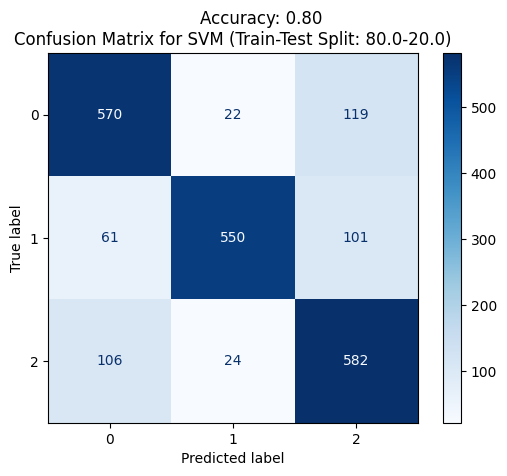

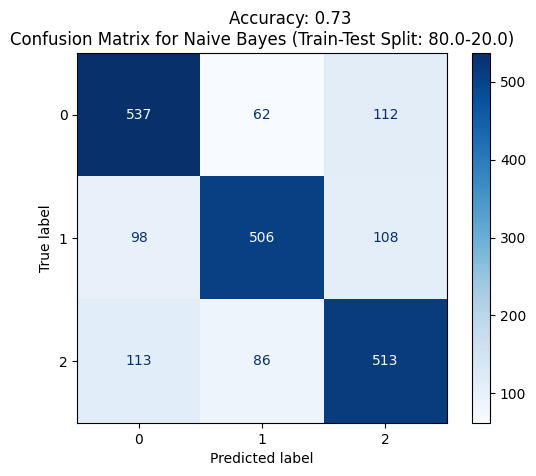

              precision    recall  f1-score   support

           0       0.71      0.74      0.72      1067
           1       0.76      0.69      0.72      1067
           2       0.67      0.70      0.68      1068

    accuracy                           0.71      3202
   macro avg       0.71      0.71      0.71      3202
weighted avg       0.71      0.71      0.71      3202

Naive Bayes Training Accuracy: 0.8414781095193467
Naive Bayes Test Accuracy: 0.7083073079325422
              precision    recall  f1-score   support

           0       0.76      0.78      0.77      1067
           1       0.92      0.76      0.83      1067
           2       0.70      0.81      0.75      1068

    accuracy                           0.78      3202
   macro avg       0.80      0.78      0.79      3202
weighted avg       0.80      0.78      0.79      3202



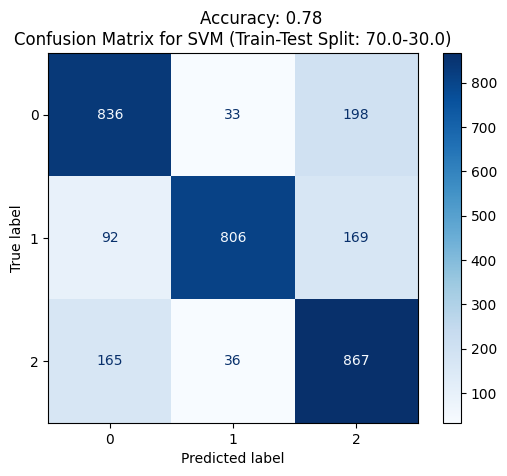

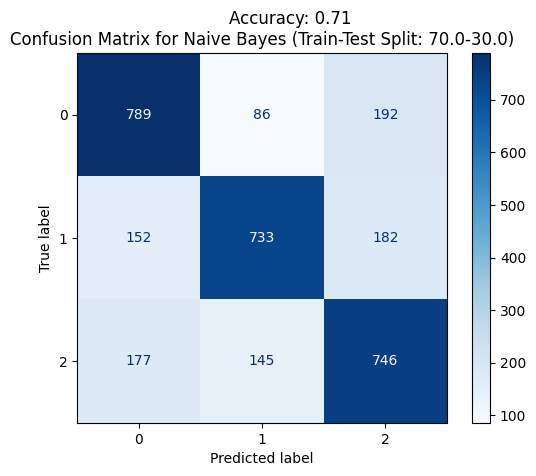

              precision    recall  f1-score   support

           0       0.69      0.71      0.70      1423
           1       0.75      0.67      0.71      1423
           2       0.66      0.71      0.68      1423

    accuracy                           0.70      4269
   macro avg       0.70      0.70      0.70      4269
weighted avg       0.70      0.70      0.70      4269

Naive Bayes Training Accuracy: 0.8428616057482037
Naive Bayes Test Accuracy: 0.6964160224877021
              precision    recall  f1-score   support

           0       0.76      0.75      0.76      1423
           1       0.91      0.73      0.81      1423
           2       0.67      0.82      0.74      1423

    accuracy                           0.77      4269
   macro avg       0.78      0.77      0.77      4269
weighted avg       0.78      0.77      0.77      4269



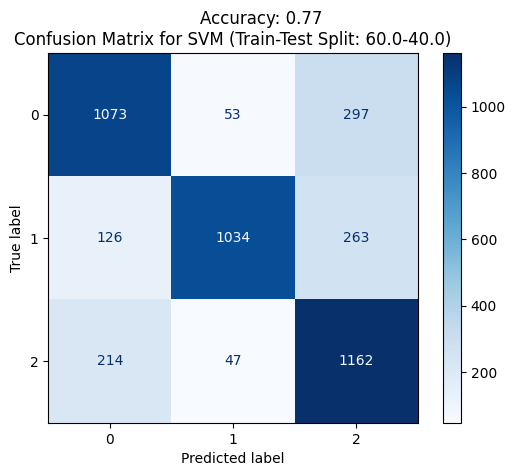

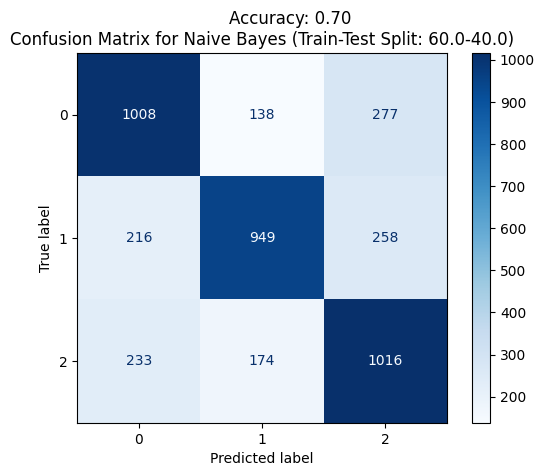

              precision    recall  f1-score   support

           0       0.68      0.71      0.70      1778
           1       0.75      0.65      0.70      1779
           2       0.64      0.71      0.67      1779

    accuracy                           0.69      5336
   macro avg       0.69      0.69      0.69      5336
weighted avg       0.69      0.69      0.69      5336

Naive Bayes Training Accuracy: 0.8545454545454545
Naive Bayes Test Accuracy: 0.6885307346326837
              precision    recall  f1-score   support

           0       0.74      0.75      0.75      1778
           1       0.91      0.71      0.80      1779
           2       0.67      0.81      0.73      1779

    accuracy                           0.76      5336
   macro avg       0.77      0.76      0.76      5336
weighted avg       0.77      0.76      0.76      5336



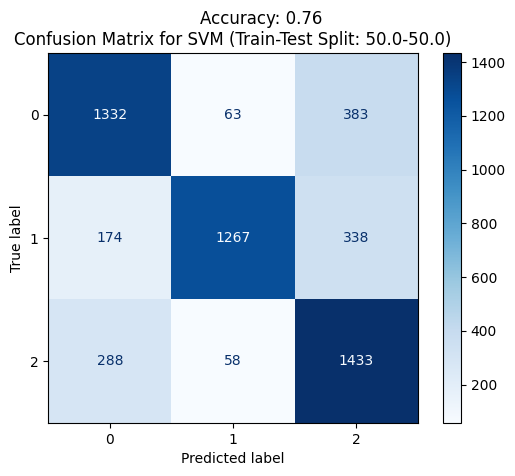

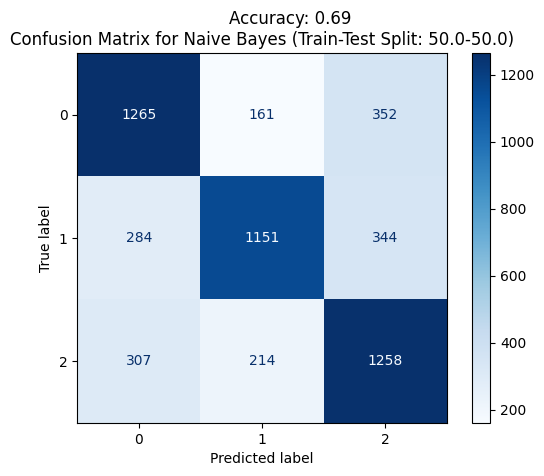

In [56]:
splits = [0.8, 0.7, 0.6, 0.5]
for split in splits:
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, stratify= y_resampled, test_size=(1-split),random_state=42)
    # X_train, X_test, y_train, y_test = train_test_split(X_labeled, y_labeled, test_size=(1-split),stratify= y_labeled, random_state=42)
    train_predict_plot(X_train, X_test, y_train, y_test, split)

In [23]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],        # Regularization parameter
    'kernel': ['linear', 'rbf'],   # Kernel type
    'gamma': ['scale', 'auto'],    # Kernel coefficient for 'rbf'
}

# Initialize the SVM model
svm = SVC()

# Initialize GridSearchCV
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
X_train, X_test, y_train, y_test = train_test_split(X_labeled, y_labeled, test_size=0.2,stratify= y_labeled, random_state=42)
grid_search_svm.fit(X_train, y_train)

# Best parameters and score
print("Best SVM Parameters:", grid_search_svm.best_params_)
print("Best SVM Cross-Validation Score:", grid_search_svm)


Best SVM Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best SVM Cross-Validation Score: GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')


In [30]:
# Define the parameter grid for Naive Bayes
param_grid_nb = {
    'alpha': [0.1, 0.5, 1.0, 5.0, 10.0],  # Smoothing parameter
}

# Initialize the Naive Bayes model
nb = MultinomialNB()

# Initialize GridSearchCV
grid_search_nb = GridSearchCV(nb, param_grid_nb, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search_nb.fit(X_labeled, y_labeled)

# Best parameters and score
print("Best Naive Bayes Parameters:", grid_search_nb.best_params_)
print("Best Naive Bayes Cross-Validation Score:", grid_search_nb.best_score_)


Best Naive Bayes Parameters: {'alpha': 0.5}
Best Naive Bayes Cross-Validation Score: 0.6374407582938388
